# **Pranav Singh Mahara**
# **21BBS0188**
# **Lab Digital Assignment - 3**

# ***Question - 1***

Collect the student attendance and performance dataset of your classroom to identify
students who are likely to drop out or fail early. Implement the KNN to classify the
above cases and display the list of students and their classes as per classifications.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
df = pd.read_csv("/content/student_new.csv")

X = df[['Attendance', 'Marks']]
y = np.where(X['Attendance'] < 75, 'Drop',
             np.where(X['Marks'] < 40, 'Fail', 'Pass'))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
  knn = KNeighborsClassifier(n_neighbors=5)
  knn.fit(X_train_scaled, y_train)

  y_pred = knn.predict(X_test_scaled)

  print("Classification Report:")
  print(classification_report(y_test, y_pred))
  print("\nConfusion Matrix:")
  print(confusion_matrix(y_test, y_pred))


  all_predictions = knn.predict(scaler.transform(X))


  df['Prediction'] = all_predictions

  print("\nStudent Classifications:")
  for _, row in df.iterrows():
      print(f"Roll Number: {row['Roll Number']}, Classification: {row['Prediction']}")

Classification Report:
              precision    recall  f1-score   support

        Drop       0.78      1.00      0.88         7
        Fail       1.00      1.00      1.00         1
        Pass       1.00      0.83      0.91        12

    accuracy                           0.90        20
   macro avg       0.93      0.94      0.93        20
weighted avg       0.92      0.90      0.90        20


Confusion Matrix:
[[ 7  0  0]
 [ 0  1  0]
 [ 2  0 10]]

Student Classifications:
Roll Number: 21BCE0001, Classification: Drop
Roll Number: 21BCE0002, Classification: Pass
Roll Number: 21BCE0003, Classification: Pass
Roll Number: 21BCE0004, Classification: Pass
Roll Number: 21BCE0005, Classification: Pass
Roll Number: 21BCE0006, Classification: Fail
Roll Number: 21BCE0007, Classification: Fail
Roll Number: 21BCE0008, Classification: Pass
Roll Number: 21BCE0009, Classification: Pass
Roll Number: 21BCE0010, Classification: Pass
Roll Number: 21BCE0011, Classification: Drop
Roll Number: 21BCE0

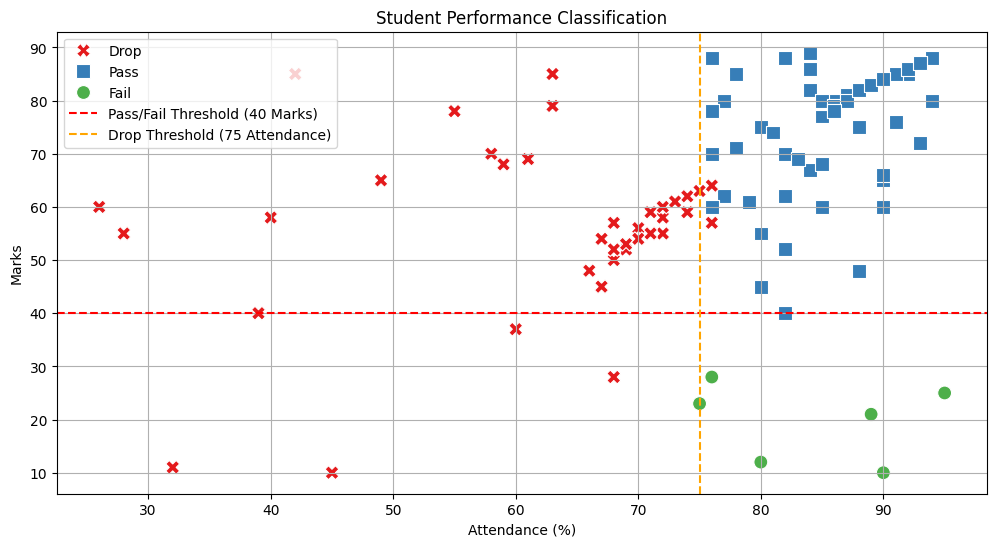


Total students at risk of dropping out: 39
Total failing students: 6
Total passing students: 55


In [30]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='Attendance', y='Marks', hue='Prediction',
                palette='Set1', style='Prediction', markers={"Drop": "X", "Fail": "o", "Pass": "s"}, s=100)
plt.title("Student Performance Classification")
plt.xlabel("Attendance (%)")
plt.ylabel("Marks")
plt.axhline(40, color='red', linestyle='--', label='Pass/Fail Threshold (40 Marks)')
plt.axvline(75, color='orange', linestyle='--', label='Drop Threshold (75 Attendance)')
plt.legend(loc="upper left")
plt.grid()
plt.show()

drop_count = (df['Prediction'] == 'Drop').sum()
fail_count = (df['Prediction'] == 'Fail').sum()
pass_count = (df['Prediction'] == 'Pass').sum()

print(f"\nTotal students at risk of dropping out: {drop_count}")
print(f"Total failing students: {fail_count}")
print(f"Total passing students: {pass_count}")

# ***Question - 2***

Linear regression of 2 variables is to use one variable to forecast another variable value. Collect the DEMAT account counts of Indians for the past 60 months. Implement the Linear regression Technique to predict what will be count in JAN2025 in future. Collect the real time sample data from news sources to perform the algorithm.

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('/content/demat_dataset.csv')

df = df.iloc[::-1]
df = df.reset_index(drop=True)

df['Month_Number'] = np.arange(len(df))

In [33]:
X = df[['Month_Number']]
y = df['DEMAT accounts']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [34]:
future_month = np.array([[61]])
predicted_count = model.predict(future_month)

print(f"Predicted DEMAT account count for January 2025: {predicted_count[0]:.0f} lakhs")

Predicted DEMAT account count for January 2025: 136 lakhs


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


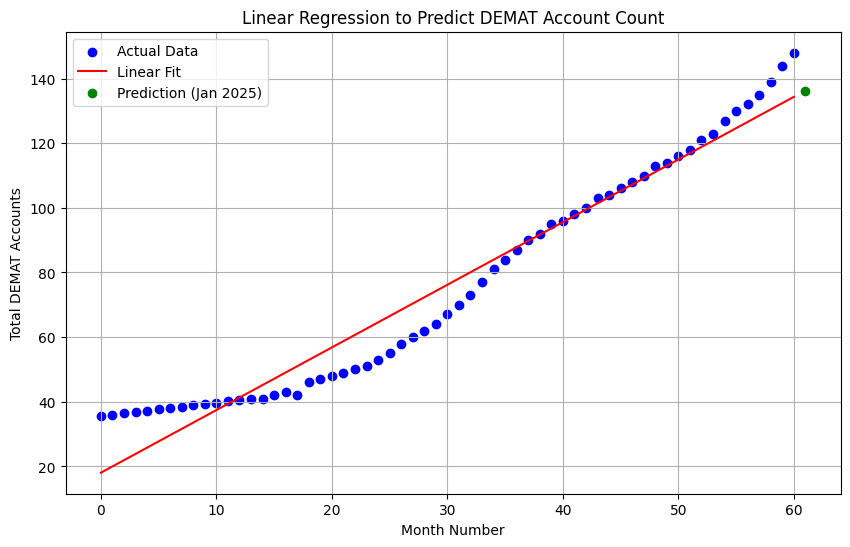

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Linear Fit')
plt.scatter(future_month, predicted_count, color='green', label='Prediction (Jan 2025)')
plt.xlabel('Month Number')
plt.ylabel('Total DEMAT Accounts')
plt.title('Linear Regression to Predict DEMAT Account Count')
plt.legend()
plt.grid(True)
plt.show()

# ***Question - 3***

Implement the Random Forest Supervised Machine Learning Algorithm that is used
widely in multi-Classifications in Fruits dataset. (Assume own dataset at least 50 entries). [Lab purpose question]

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('/content/fruits-dataset.csv')

label_encoders = {}
categorical_columns = ['Color', 'Texture']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column + '_Encoded'] = label_encoders[column].fit_transform(df[column])

In [38]:
X = df[['Weight', 'Color_Encoded', 'Color_Intensity', 'Sweetness_Level', 'Texture_Encoded']]
y = df['Fruit_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

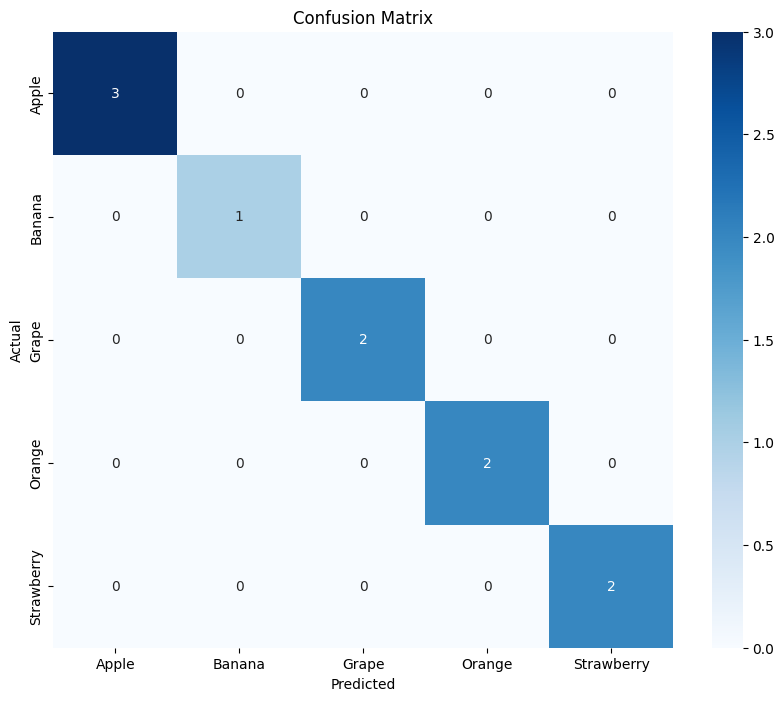

In [39]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

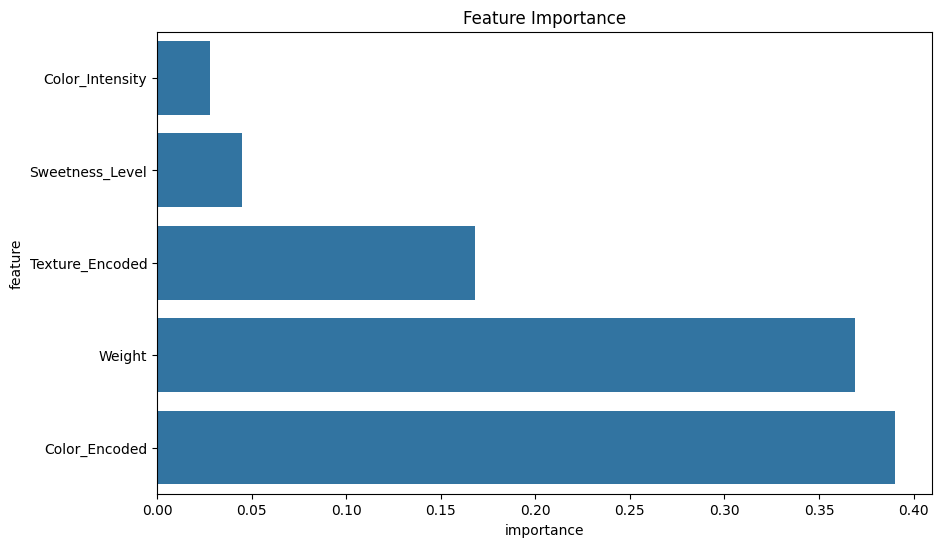

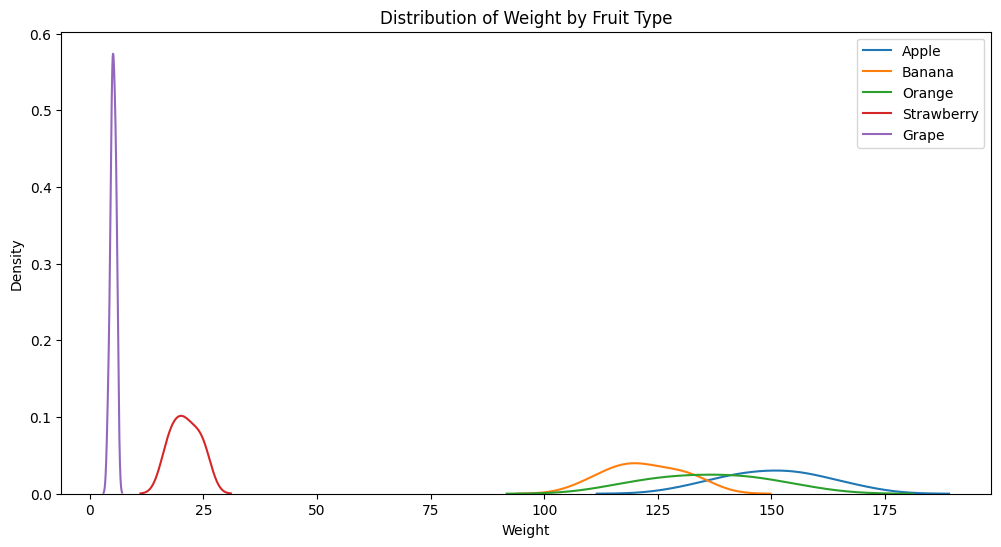

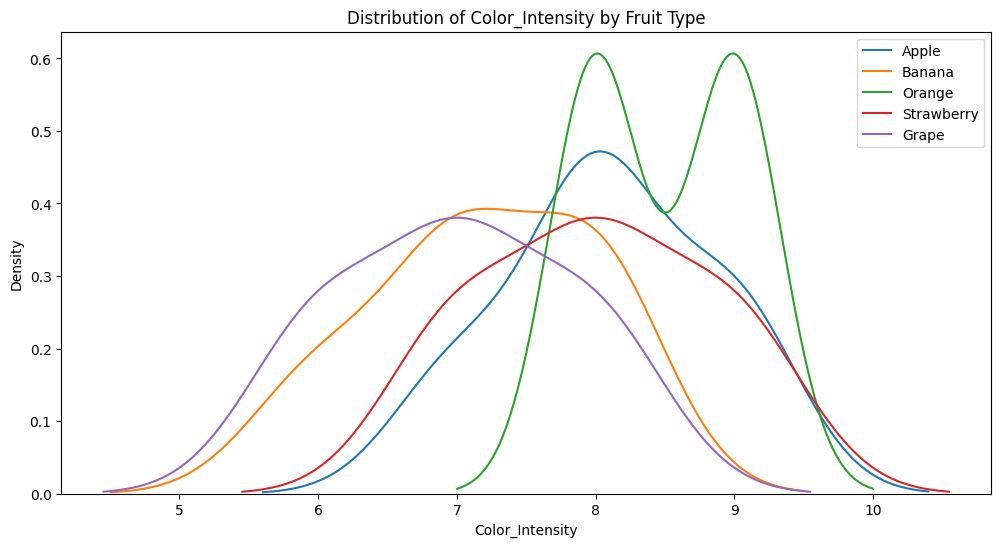

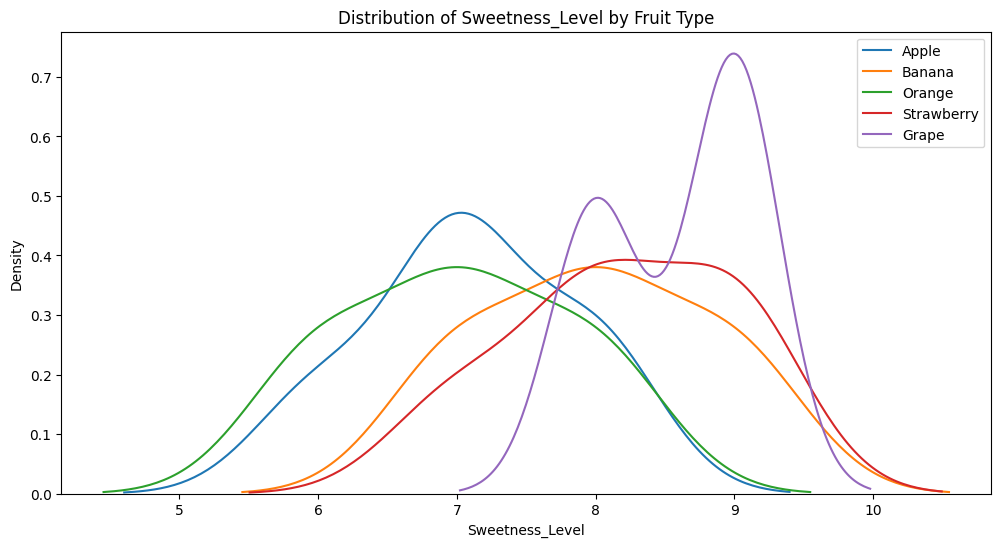

In [40]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


numerical_features = ['Weight', 'Color_Intensity', 'Sweetness_Level']

for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    for fruit in df['Fruit_Type'].unique():
        sns.kdeplot(data=df[df['Fruit_Type'] == fruit][feature], label=fruit)
    plt.title(f'Distribution of {feature} by Fruit Type')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


In [41]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


def predict_fruit(weight, color, color_intensity, sweetness, texture):
    color_encoded = label_encoders['Color'].transform([color])[0]
    texture_encoded = label_encoders['Texture'].transform([texture])[0]

    features = np.array([[weight, color_encoded, color_intensity, sweetness, texture_encoded]])
    prediction = rf_model.predict(features)
    probabilities = rf_model.predict_proba(features)

    return prediction[0], probabilities[0]


example_fruit = predict_fruit(140, 'Red', 8, 7, 'Crisp')
print("\nExample Prediction:")
print(f"Predicted fruit: {example_fruit[0]}")
print("Probabilities for each class:")
for fruit_type, prob in zip(rf_model.classes_, example_fruit[1]):
    print(f"{fruit_type}: {prob:.2f}")

Classification Report:
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00         3
      Banana       1.00      1.00      1.00         1
       Grape       1.00      1.00      1.00         2
      Orange       1.00      1.00      1.00         2
  Strawberry       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


Example Prediction:
Predicted fruit: Apple
Probabilities for each class:
Apple: 0.90
Banana: 0.10
Grape: 0.00
Orange: 0.00
Strawberry: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
